## Pertemuan 5 - Hierarchical Clustering


### Import Libraries

Pada praktikum ini kita akan menggunakan scipy dan scikit-learn package.

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Import Library yang dibutuhkan
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Import Library yang dibutuhkan untuk proses Agglomerative Clustering
import scipy
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

### 1. Teknik Agglomerative untuk Dataset Random

#### Generate Random Data menggunakan make_blobs

In [16]:
# Generate Random Data
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2,-1], [1,1], [10,4]], cluster_std=0.9)

In [17]:
# Menampilkan dimensi generate data
X1.shape

(50, 2)

#### Plotting Random Data

Menghasilkan output yang membagi data menjadi beberapa kelompok

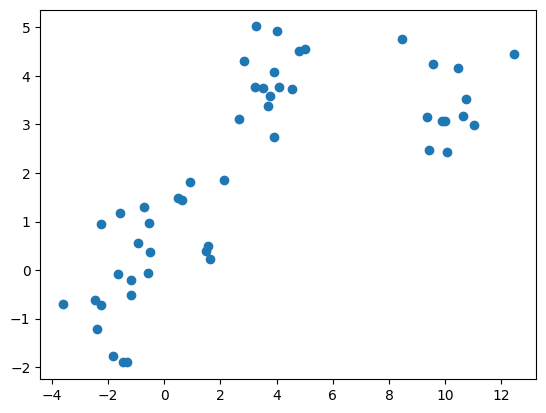

In [18]:
# Plotting Random Data
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

#### Agglomerative Clustering

Kelas Agglomerative Clustering akan membutuhkan dua masukan yaitu n_clusters dan linkage

In [19]:
# Inisialisasi objek AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'single')

# Melatih model pengelompokan pada dataset
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='single', n_clusters=4)

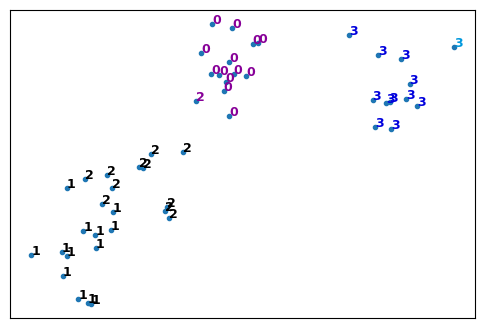

In [20]:
# Membuat figure dengan ukuran 6, 4
plt.figure(figsize=(6,4))

# Membuat minimum dan maximum range dari X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Mencari rata-rata dari jarak X1.
X1 = (X1 - x_min) / (x_max - x_min)

# Looping untuk mendisplay semua datapoints.
for i in range(X1.shape[0]) :
  plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
    color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
    fontdict={'weight' : 'bold', 'size' : 9})

# Hapus x ticks, y ticks, x dan y axis (garis koordinat)
plt.xticks([])
plt.yticks([])

# Menampilkan plot dari data asli sebelum dicluster
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Menampilkan plot
plt.show()

#### Plotting Dendogram (Mencari Jarak)
Plotting Dendogram akan digunakan untuk menentukan jarak antara titik ke titik lain dari sebuah dataset random (X1) yang sudah kita inisialisasi.

In [21]:
# Menghitung matriks jarak antara dua set data
dist_matrix = distance_matrix(X1,X1)

# Mencetak hasil matriks jarak
print(dist_matrix)

[[0.         0.64987793 0.55315011 ... 0.48290479 0.75068849 0.76465931]
 [0.64987793 0.         0.39865976 ... 0.3874956  0.1725845  0.2590013 ]
 [0.55315011 0.39865976 0.         ... 0.07115866 0.35191003 0.29877889]
 ...
 [0.48290479 0.3874956  0.07115866 ... 0.         0.37268634 0.33650137]
 [0.75068849 0.1725845  0.35191003 ... 0.37268634 0.         0.09939262]
 [0.76465931 0.2590013  0.29877889 ... 0.33650137 0.09939262 0.        ]]


In [22]:
# Memberikan parameter pada kelas linkage dari hierarki
X = hierarchy.linkage(dist_matrix, 'single')
Y = hierarchy.linkage(dist_matrix, 'average')
Z = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-22-13017d1123c7>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(dist_matrix, 'single')
<ipython-input-22-13017d1123c7>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(dist_matrix, 'average')
<ipython-input-22-13017d1123c7>:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


Text(0.5, 1.0, 'Single Linkage')

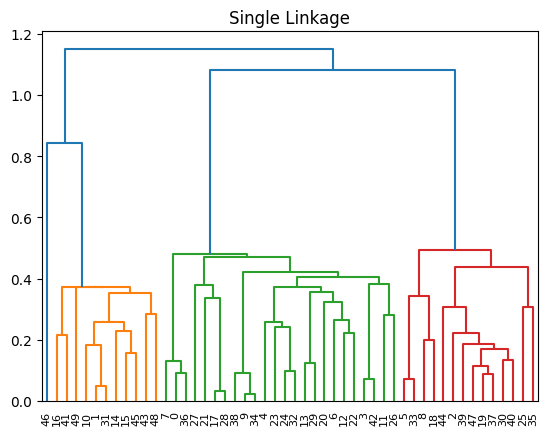

In [23]:
# Single Linkage
dendroX = hierarchy.dendrogram(X)
plt.title("Single Linkage")

Text(0.5, 1.0, 'Average Linkage')

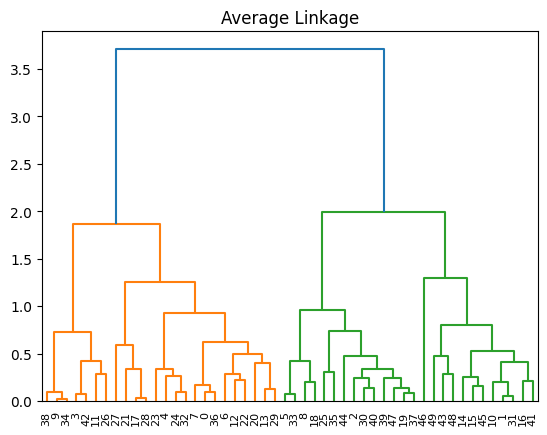

In [24]:
# Average Linkage
dendroY = hierarchy.dendrogram(Y)
plt.title("Average Linkage")

Text(0.5, 1.0, 'Complete Linkage')

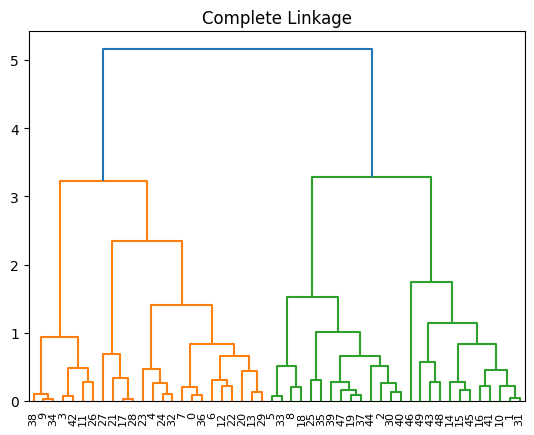

In [25]:
# Complete Linkage
dendroZ = hierarchy.dendrogram(Z)
plt.title("Complete Linkage")

### 2. Teknik Agglomerative untuk Cars Clustering

#### Read Data

In [26]:
# Membaca dataset dengan library panda
pdf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cars_clus.csv")

In [27]:
# Menampilkan dimensi dataset
pdf.shape

(159, 16)

In [28]:
# Menampilkan 10 data teratas
pdf.head(10)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0
5,Audi,A6,18.78,23.555,0,33.95,2.8,200,108.7,76.1,192,3.561,18.5,22,2.933,0
6,Audi,A8,1.38,39,0,62,4.2,310,113,74,198.2,3.902,23.7,21,0.322,0
7,BMW,323i,19.747,$null$,0,26.99,2.5,170,107.3,68.4,176,3.179,16.6,26.1,2.983,0
8,BMW,328i,9.231,28.675,0,33.4,2.8,193,107.3,68.5,176,3.197,16.6,24,2.223,0
9,BMW,528i,17.527,36.125,0,38.9,2.8,193,111.4,70.9,188,3.472,18.5,24.8,2.864,0


#### Data Cleaning
Melakukan data cleaning dengan membuang baris yang memiliki nilai null.

In [29]:
# Mencetak dimensi dataset sebelum proses pembersihan
print("Dimensi dataset sebelum cleaning:", pdf.size)

# Mengubah kolom tertentu menjadi tipe data numerik, dan mengatasi nilai non-numerik dengan menggantinya menjadi NaN
pdf[['sales', 'resale', 'type','price','engine_s','horsepow','wheelbas','width',
      'length','curb_wgt','fuel_cap','mpg', 'lnsales']] = pdf[['sales', 'resale',
      'type','price','engine_s','horsepow','wheelbas','width','length','curb_wgt',
      'fuel_cap','mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

# Menghapus baris yang mengandung nilai NaN
pdf = pdf.dropna()
# Mengatur ulang indeks setelah penghapusan baris
pdf = pdf.reset_index(drop=True)
# Mencetak dimensi dataset setelah proses pembersihan
print("Ukuran pdf setelah cleaning:", pdf.size)
# Menampilkan 10 baris pertama dari dataset yang telah dibersihkan
pdf.head(10)

Dimensi dataset sebelum cleaning: 2544
Ukuran pdf setelah cleaning: 1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0.0,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0.0,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0.0,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0.0,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0
5,Audi,A8,1.380,39.000,0.0,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,0.322,0
6,BMW,328i,9.231,28.675,0.0,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,2.223,0
7,BMW,528i,17.527,36.125,0.0,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,24.8,2.864,0
8,Buick,Century,91.561,12.475,0.0,21.975,3.1,175.0,109.0,72.7,194.6,3.368,17.5,25.0,4.517,0
9,Buick,Regal,39.350,13.740,0.0,25.300,3.8,240.0,109.0,72.7,196.2,3.543,17.5,23.0,3.672,0


#### Features Selection


In [30]:
# Feature Selection
featureset = pdf[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]
featureset.head()

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
3,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
4,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0


#### Normalization

In [31]:
from sklearn.preprocessing import MinMaxScaler

# x berisikan nilai dari featureset yang nantinya akan digunakan untuk normalisasi
x = featureset.values

# Membuat objek MinMaxScaler
min_max_scaler = MinMaxScaler()

# Menggunakan fit_transform untuk mengubah nilai variabel dalam rentang 0 hingga 1
feature_mtx = min_max_scaler.fit_transform(x)

# Menampilkan lima baris pertama dari hasil normalisasi
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

#### A. Agglomerative Clustering with Scipy
Scipy digunakan untuk menghitung jarak antara cluster yang baru terbentuk.

In [32]:
# Clustering with Scipy
import scipy
import pylab
import scipy.cluster.hierarchy

# Mendapatkan jumlah baris (leng) dalam feature_mtx
leng = feature_mtx.shape[0]
# Inisialisasi matriks jarak D dengan nol
D = scipy.zeros([leng,leng])

# Menghitung jarak euclidean antara setiap pasangan data dalam feature_mtx
for i in range(leng):
  for j in range(leng):
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

<ipython-input-32-fee298592f89>:11: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


#### Complete Linkage

In [33]:
# Complete Linkage
Z = hierarchy.linkage(D, 'complete')

<ipython-input-33-8b13e7d5f0a9>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [34]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Complete Linkage")
# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

Complete Linkage


array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

In [35]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Complete Linkage")
# Menentukan jumlah klaster yang diinginkan (k)
k = 5
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, k, criterion = 'maxclust')
clusters

Complete Linkage


array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

#### Plotting Dendogram Complete Linkage

Melakukan plotting dendogram terhadap model dan akan menampilkan lebih jelas dari hasil clustering yang sudah terbentuk.

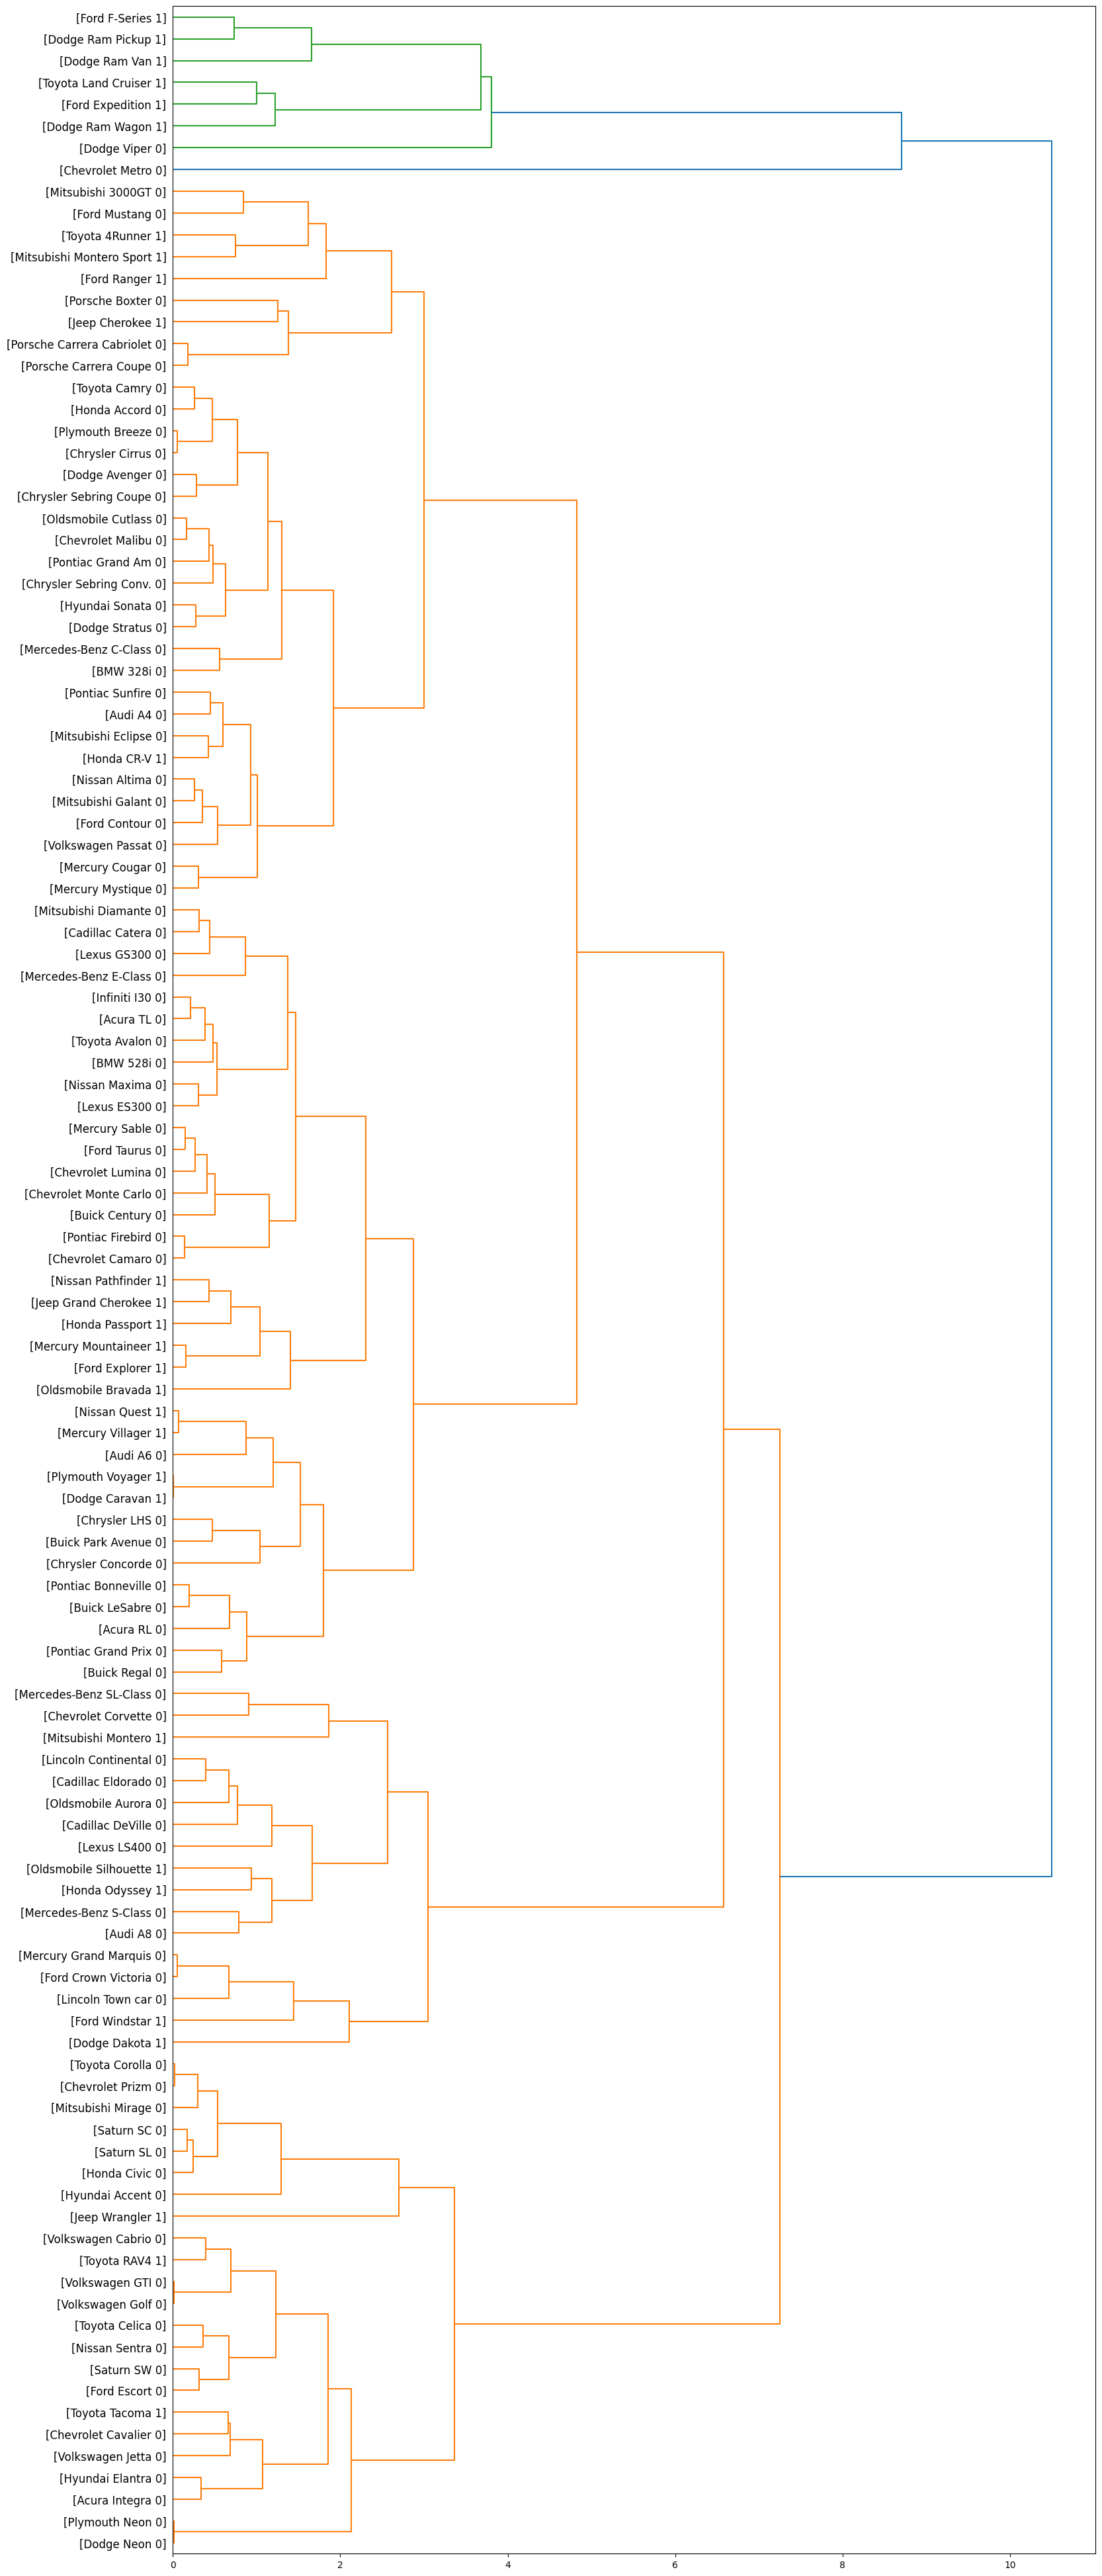

In [36]:
# Complete Dendogram

# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(18,50))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
  return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id],
                         int(float(pdf['type'][id])))

# Membuat dendrogram
dendro = hierarchy.dendrogram(Z, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

#### B. Agglomerative Clustering with Scikit Learn
Library scikit-learn digunakan untuk  mengelompokkan dataset, Agglomerative Clustering melakukan pengelompokan hierarkis menggunakan pendekatan bottom-up.
Berikut ini merupakan masukan untuk menampilkan matriks dari clustering yang akan dilakukan.

In [37]:
# Mencari jarak matrix
dist_matrix = distance_matrix(feature_mtx, feature_mtx)

# Mencetak matriks jarak yang dihasilkan
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [38]:
# Complete Linkage
# Membuat objek dari kelas AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')

# Melakukan clustering
agglom.fit(feature_mtx)
agglom.labels_

array([1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 5, 1,
       4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 0, 0, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 5, 1, 1, 2, 3, 2, 1, 3,
       2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1])

In [39]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame pdf
pdf['cluster_'] = agglom.labels_

# Menampilkan lima baris pertama
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,1
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,2


#### Plotting dengan scatter plot

<ipython-input-40-26aac0ba3e25>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

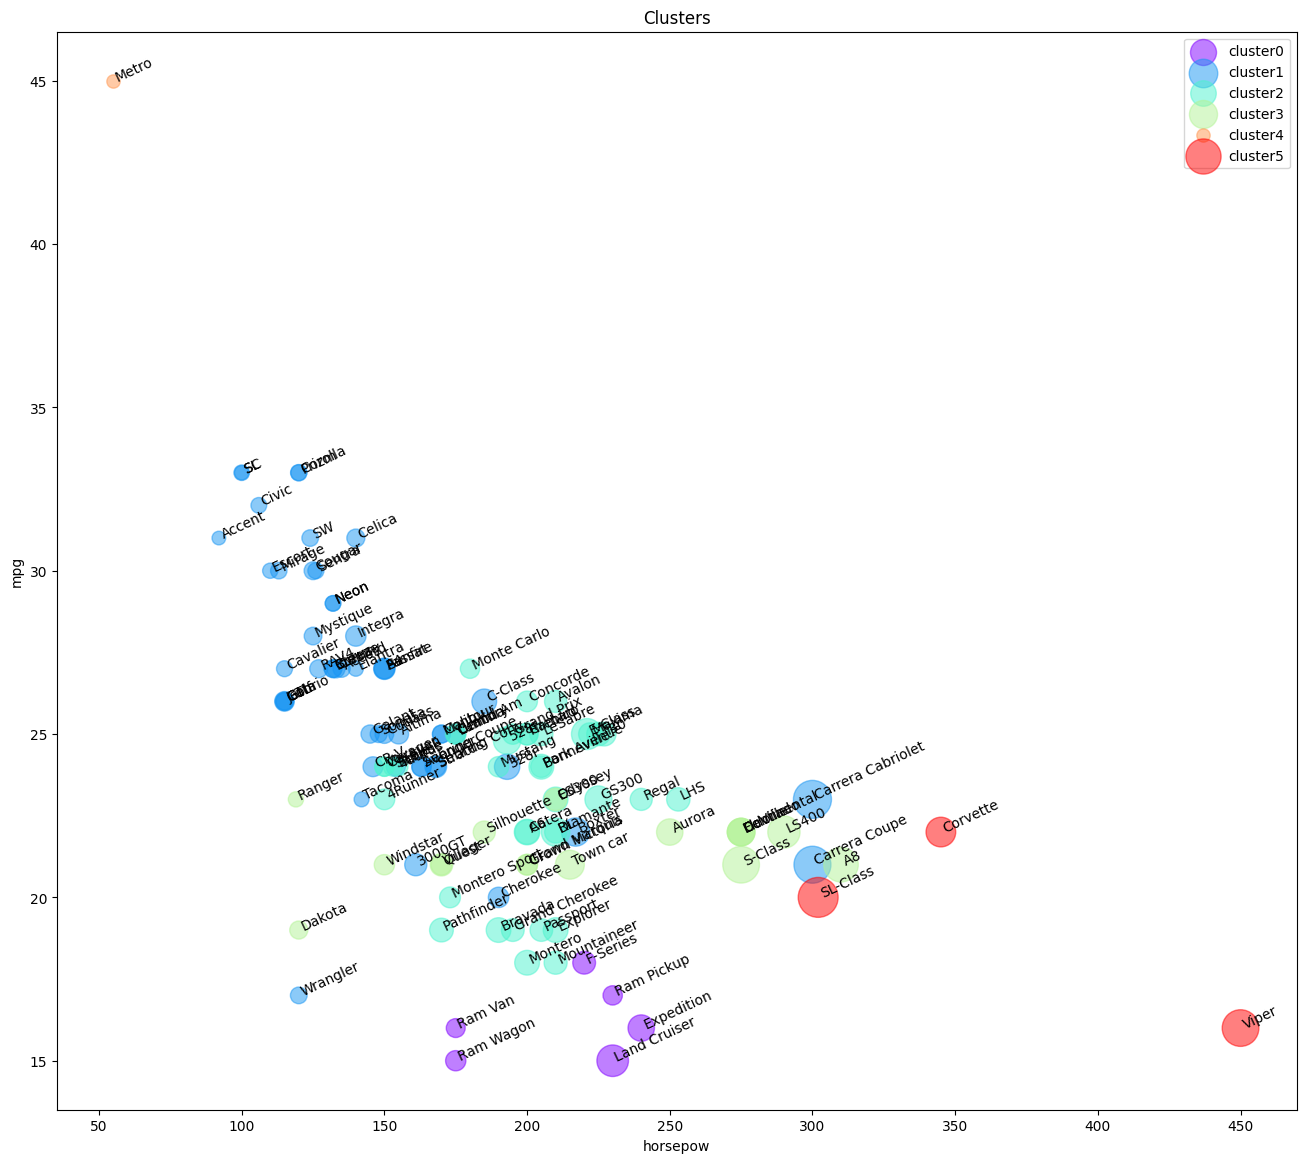

In [40]:
# Mengimpor modul colormap dari pustaka Matplotlib
import matplotlib.cm as cm

# Inisialisasi Warna dan Label Klaster
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# Membuat daftar label klaster.
cluster_labels = list(range(0, n_clusters))

# Membuat gambar dengan ukuran 6x4 inch
plt.figure(figsize=(16,14))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
  subset = pdf[pdf.cluster_ == label]
  for i in subset.index:
          plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [41]:
# Menghitung tipe di setiap cluster
pdf.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         1.0      6
1         0.0     47
          1.0      5
2         0.0     27
          1.0     11
3         0.0     10
          1.0      7
4         0.0      1
5         0.0      3
Name: cluster_, dtype: int64

In [42]:
# Karakteristik masing-masing cluster
agg_cars = pdf.groupby(['cluster_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()
agg_cars

<ipython-input-42-810f0cf8b73c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = pdf.groupby(['cluster_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   145.000000  2.580000  22.200000  17.009200
2        0.0   203.111111  3.303704  24.214815  27.750593
         1.0   182.090909  3.345455  20.181818  26.265364
3        0.0   256.500000  4.410000  21.500000  42.870400
         1.0   160.571429  3.071429  21.428571  21.527714
4        0.0    55.000000  1.000000  45.000000   9.235000
5        0.0   365.666667  6.233333  19.333333  66.010000

#### Ploting Dendogram Complete Linkage

<ipython-input-43-ff391fcc8e5a>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s = subset.price*20, c = color, label = 'cluster' + str(label))


Text(0, 0.5, 'mpg')

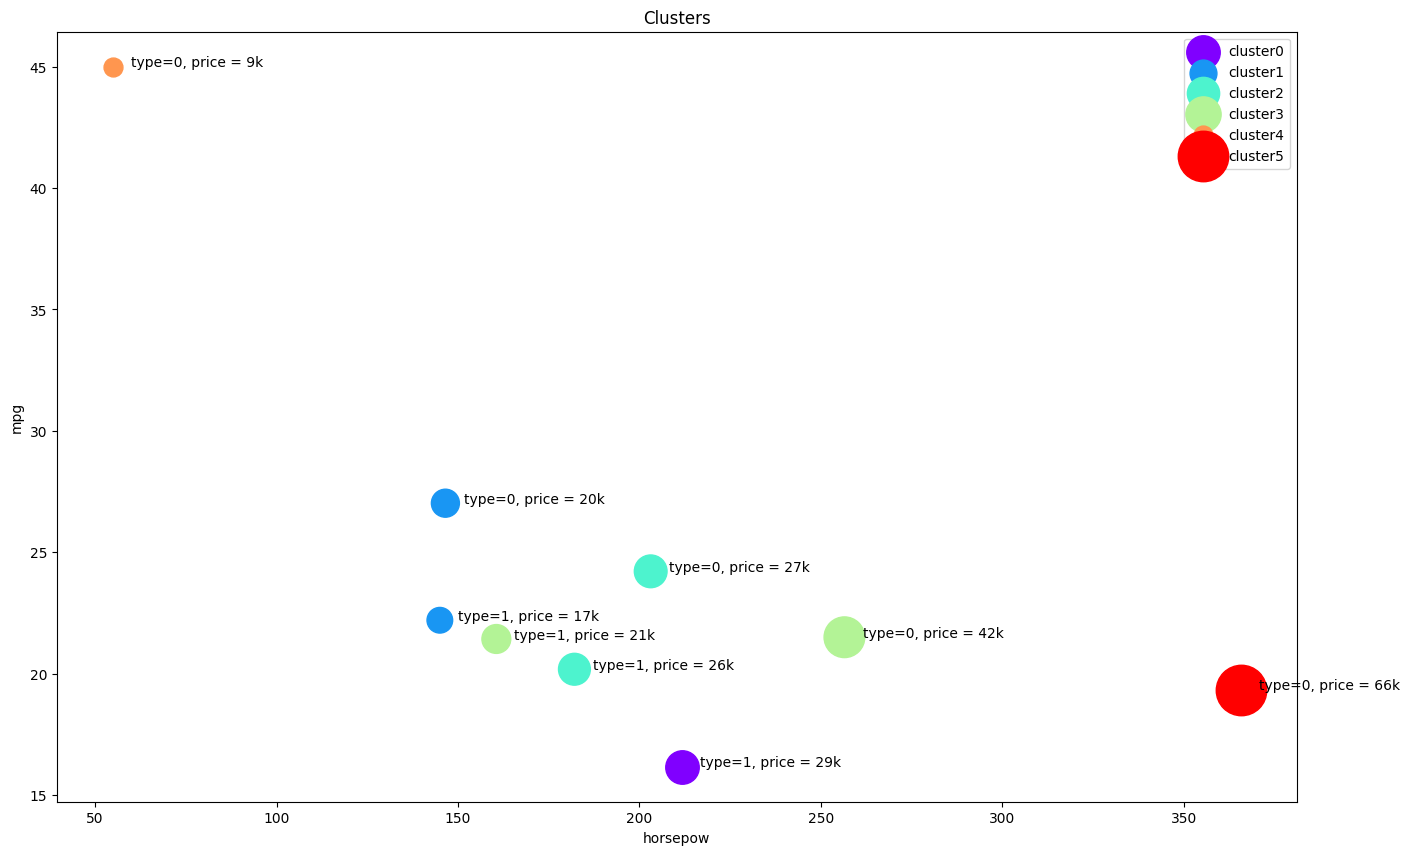

In [43]:
# Membuat objek gambar (figure) dengan ukuran 16x10.
plt.figure(figsize=(16, 10))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
  subset = agg_cars.loc[(label,),]
  for i in subset.index:
    plt.text(subset.loc[i][0] + 5, subset.loc[i][2], 'type=' + str(int(i)) + ', price = ' + str(int(subset.loc[i][3])) + 'k')
  plt.scatter(subset.horsepow, subset.mpg, s = subset.price*20, c = color, label = 'cluster' + str(label))

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')